In [ ]:
#Autor: Andrés
#Tarea: https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/20#issue-2913499571
#Objetivo: crear un arbol de decision que sepa predecir el ganador de una pelea 
#          en la base de datos que no contiene las estadisticas ponderadas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import os

In [ ]:
ruta_peleas = os.path.join("..","..", "data", "processed","peleas.parquet")
df_peleas = pd.read_parquet(ruta_peleas) 
df_peleas = df_peleas.drop(columns=["DATE","CATEGORY","METHOD","Peleador_A","Peleador_B",'TITLE_FIGHT', 'WOMEN','ROUND'])
df_peleas.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,Olivier Aubin-Mercier,Tony Sims,2015-08-23,LIGHTWEIGHT,False,Decision - Unanimous,300,3,0,0,...,2,0,1,0,0,0,0,0,1,1
1,Elvis Mutapcic,Anthony Smith,2016-12-03,MIDDLEWEIGHT,True,KO/TKO,207,2,0,1,...,0,0,1,1,1,0,0,1,1,1
2,Michael Johnson,Edward Faaloloto,2011-06-26,LIGHTWEIGHT,False,KO/TKO,282,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,Polyana Viana,Mallory Martin,2021-02-13,STRAWWEIGHT,False,Submission,198,1,0,0,...,3,1,0,0,0,0,1,2,2,0
4,Charles Jourdain,Nathaniel Wood,2022-09-03,FEATHERWEIGHT,True,Decision - Unanimous,300,3,0,0,...,1,3,1,3,0,1,1,0,5,1


In [26]:
X_peleas = df_peleas.drop(columns=["WINNER"])
y_peleas = df_peleas["WINNER"]

In [27]:
X_temp,X_test,y_temp,y_test = train_test_split(X_peleas,y_peleas,test_size=0.15,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.15,random_state=42)

Precision en el conjunto de validacion: 83.82%

Clasificacion (Validación):
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       623
        True       0.78      0.79      0.79       378

    accuracy                           0.84      1001
   macro avg       0.83      0.83      0.83      1001
weighted avg       0.84      0.84      0.84      1001

Precision en el conjunto de test: 84.03%

Clasificacion (Test):
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       743
        True       0.78      0.78      0.78       434

    accuracy                           0.84      1177
   macro avg       0.83      0.83      0.83      1177
weighted avg       0.84      0.84      0.84      1177



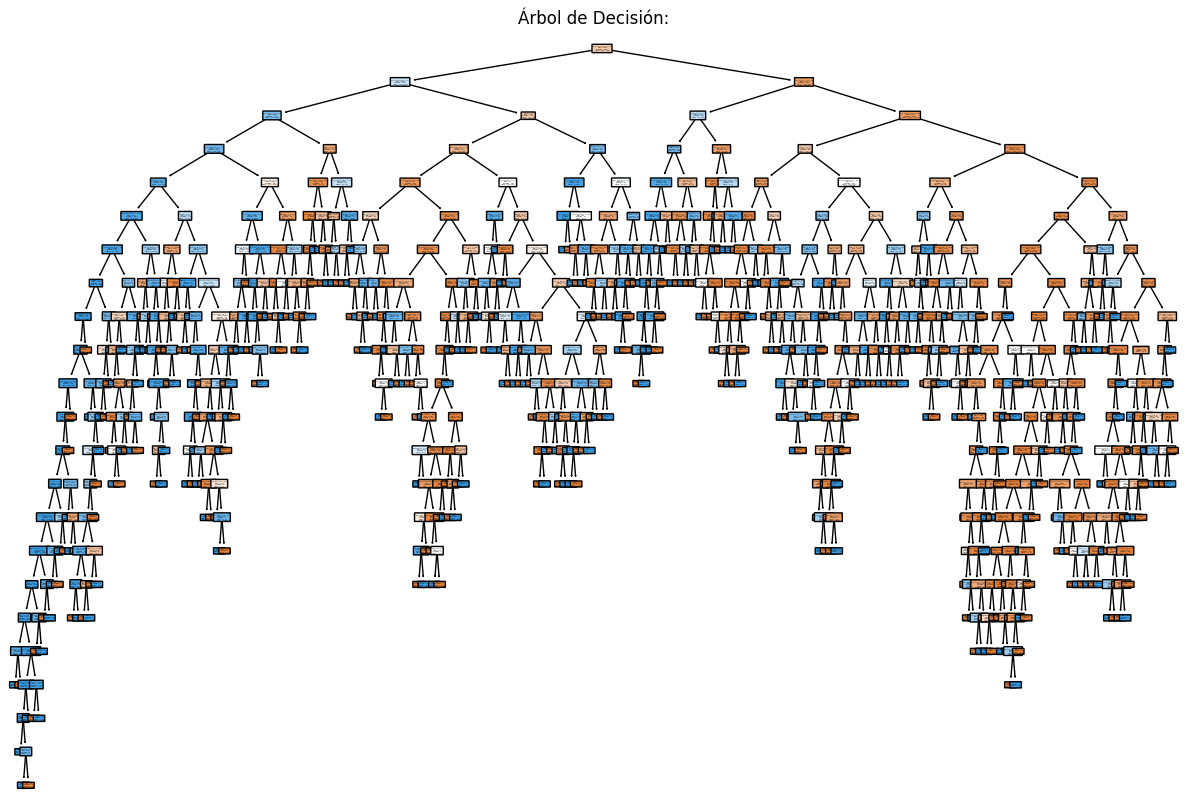

In [28]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Precision en el conjunto de validacion: {accuracy_val * 100:.2f}%')

print("\nClasificacion (Validación):")
print(classification_report(y_val, y_val_pred))

y_test_pred = clf.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Precision en el conjunto de test: {accuracy_test * 100:.2f}%')

# Mostrar el reporte de clasificación para el conjunto de prueba
print("\nClasificacion (Test):")
print(classification_report(y_test, y_test_pred))

# Visualizar el árbol de decisión (opcional)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=train.columns, class_names=["B gana", "A gana"], rounded=True)
plt.title("Árbol de Decisión:")
plt.show()
